#Predicting 

In [1]:
import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('impact_factor_merged_file_3_10.csv')
raw_data.head()

jornal_url  \
0                     /journal/16540/theranostics   
1                     /journal/17219/nanomedicine   
2             /journal/41207/current-nanomedicine   
3  /journal/59226/nanomedicine-and-nanotoxicology   
4     /journal/91152/nanomedicine-and-nanobiology   

                           journal  article_number  citation_number  \
0                     Theranostics          3600.0         110600.0   
1                     Nanomedicine          2400.0          81900.0   
2             Current Nanomedicine           118.0            234.0   
3  Nanomedicine and Nanotoxicology           150.0            383.0   
4     Nanomedicine and Nanobiology            19.0             33.0   

   impact_factor                                         most_cited    year  \
0           11.8           Progress in Exosome Isolation Techniques  2017.0   
1            5.4        Nanocarriers For Drug Delivery: Mini Review  2018.0   
2            0.9         Lanthanide-Doped Luminescent Nanomaterials  2014.0   
3            0.3    Nanoparticle PEGylation for imaging and therapy  2011.0   
4            NaN  Enhanced Oral Bioavailability of (+)-Catechin ...  2014.0   

   cited_by           Search_Keywords  
0     797.0  theranostic+nanomedicine  
1      25.0  theranostic+nanomedicine  
2      41.0  theranostic+nanomedicine  
3    1400.0  theranostic+nanomedicine  
4       6.0  theranostic+nanomedicine

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3953 entries, 0 to 3952
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   jornal_url       3953 non-null   object 
 1   journal          3953 non-null   object 
 2   article_number   3953 non-null   float64
 3   citation_number  3930 non-null   float64
 4   impact_factor    2600 non-null   float64
 5   most_cited       3935 non-null   object 
 6   year             3895 non-null   float64
 7   cited_by         3918 non-null   float64
 8   Search_Keywords  3953 non-null   object 
dtypes: float64(5), object(4)
memory usage: 278.1+ KB


In [4]:
# Drop columns with missing values
clean_data = raw_data.dropna(axis=1)

# Drop columns with missing values
clean_data = raw_data.dropna(axis=0)

# Remove duplicates
clean_data = clean_data.drop_duplicates()

In [5]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2567 entries, 0 to 3950
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   jornal_url       2567 non-null   object 
 1   journal          2567 non-null   object 
 2   article_number   2567 non-null   float64
 3   citation_number  2567 non-null   float64
 4   impact_factor    2567 non-null   float64
 5   most_cited       2567 non-null   object 
 6   year             2567 non-null   float64
 7   cited_by         2567 non-null   float64
 8   Search_Keywords  2567 non-null   object 
dtypes: float64(5), object(4)
memory usage: 200.5+ KB


In [6]:
clean_data[['Keyword_1', 'Keyword_2']] = clean_data['Search_Keywords'].str.split('+',expand=True)
clean_unwrap_p1=clean_data.drop(columns=['Keyword_2'])
clean_unwrap_p1=clean_unwrap_p1.rename(columns={'Keyword_1': 'keyword'})
clean_unwrap_p2=clean_data.drop(columns=['Keyword_1'])
clean_unwrap_p2=clean_unwrap_p2.rename(columns={'Keyword_2': 'keyword'})
clean_unwrap=clean_unwrap_p1.append(clean_unwrap_p2, ignore_index=True)

In [85]:
IF_cat_conditions = [
    (clean_unwrap['impact_factor'] < 1),
    (clean_unwrap['impact_factor'] < 4),
    (clean_unwrap['impact_factor'] < 7),
    (clean_unwrap['impact_factor'] < 10),
    (clean_unwrap['impact_factor'] < 28),
    (clean_unwrap['impact_factor'] >= 28)
]
IF_cat_categories = ['<1', '[1,4)', '[4,7)', '[7,10)', '[10,28)', '>=28']

clean_unwrap['IF_category'] = np.select(IF_cat_conditions, IF_cat_categories, default='Unknown')
clean_unwrap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5134 entries, 0 to 5133
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   jornal_url       5134 non-null   object 
 1   journal          5134 non-null   object 
 2   article_number   5134 non-null   float64
 3   citation_number  5134 non-null   float64
 4   impact_factor    5134 non-null   float64
 5   most_cited       5134 non-null   object 
 6   year             5134 non-null   float64
 7   cited_by         5134 non-null   float64
 8   Search_Keywords  5134 non-null   object 
 9   keyword          5134 non-null   object 
 10  IF_category      5134 non-null   object 
dtypes: float64(5), object(6)
memory usage: 481.3+ KB


In [67]:
clean_unwrap.info()
clean_unwrap=clean_unwrap.drop_duplicates()
total_ar_num = len(clean_unwrap['journal'].unique())
df = clean_unwrap

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5134 entries, 0 to 5133
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   jornal_url       5134 non-null   object 
 1   journal          5134 non-null   object 
 2   article_number   5134 non-null   float64
 3   citation_number  5134 non-null   float64
 4   impact_factor    5134 non-null   float64
 5   most_cited       5134 non-null   object 
 6   year             5134 non-null   float64
 7   cited_by         5134 non-null   float64
 8   Search_Keywords  5134 non-null   object 
 9   keyword          5134 non-null   object 
 10  IF_category      5134 non-null   object 
dtypes: float64(5), object(6)
memory usage: 481.3+ KB


In [68]:
keyword_list = df['keyword'].unique()
set_array = []
for i in range(len(keyword_list)):
    set_array.append(set(df[df['keyword'] == keyword_list[i]]['journal'].unique()))

In [69]:
#!pip install matplotlib-venn
from matplotlib_venn import venn2, venn3

venn3(set_array[0:3], 
      set_labels=keyword_list[0:3],
      set_colors=('red', 'green', 'blue'))
venn3(set_array[3:6], 
      set_labels=keyword_list[3:6],
      set_colors=('yellow', 'purple', 'cyan'))
venn2(set_array[6:8], 
      set_labels=keyword_list[6:8],
      set_colors=('orange', 'magenta'))
plt.title('Venn diagram of different keyword')
plt.show()

In [70]:
import pandas as pd

# assume we have a list of sets and keyword_list
sets = set_array

# compute the intersection sets
n = len(sets)
intersections = {}
max_coverage = {}  # Dictionary to track the maximum coverage for each pair
for i in range(n):
    for j in range(i+1, n):
        key = (i, j)
        intersection = sets[i].intersection(sets[j])
        coverage = len(intersection) / min(len(sets[i]), len(sets[j]))
        intersections[key] = intersection
        max_coverage[key] = coverage

# create the matrix and DataFrame
matrix = np.zeros((n, n))
data = []
for i in range(n):
    row = []
    for j in range(i+1, n):
        key = (i, j)
        intersection_len = len(intersections[key])
        matrix[i, j] = intersection_len
        matrix[j, i] = intersection_len
        row.append(intersection_len)
    row.append(len(sets[i]))
    data.append(row)

# create the DataFrame
columns = keyword_list + ['Total']
df_countmx = pd.DataFrame(data, columns=columns)

# save the matrix as a CSV file
df_countmx.to_csv('pair_matrix.csv', index=False)

# flatten the matrix into a list
matrix_flattened = matrix[np.triu_indices(n, k=1)].tolist()

max_list_pair = []
for key, coverage in max_coverage.items():
    # print(f"Pair {key}: {coverage}")
    pairstring = keyword_list[key[0]] + \
        "&" + keyword_list[key[1]]
    max_list_pair.append([pairstring, round(coverage*100, 2)])

df_max_list_pair = pd.DataFrame(max_list_pair, columns=['Pair', 'Max_Coverage'])
df_max_list_pair_sorted = df_max_list_pair.sort_values('Max_Coverage')

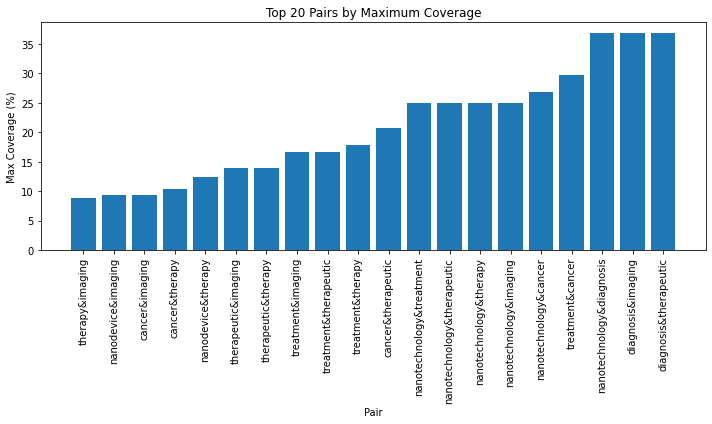

In [71]:
top_20 = df_max_list_pair_sorted.head(20)
plt.figure(figsize=(10, 6))
plt.bar(top_20['Pair'], top_20['Max_Coverage'])
plt.xlabel('Pair')
plt.ylabel('Max Coverage (%)')
plt.title('Top 20 Pairs by Maximum Coverage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [72]:
# Filter the DataFrame to get pairs with 100 percent coverage
pairs_with_100_coverage = df_max_list_pair_sorted[df_max_list_pair_sorted['Max_Coverage'] == 100]

# Display the pairs with 100 percent coverage
kw_100_pair=[]
for index, row in pairs_with_100_coverage.iterrows():
    kw_100_pair.append(row['Pair'])
kw_100_str = ";".join(kw_100_pair)


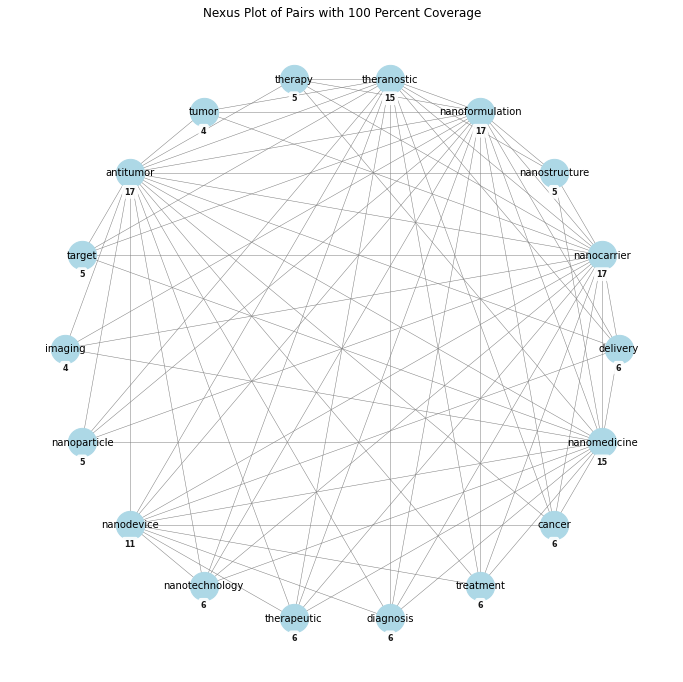

In [73]:
import random
import networkx as nx
# Create a graph
graph = nx.Graph()

# Add edges to the graph
for pair in kw_100_pair:
    node1, node2 = pair.split('&')
    graph.add_edge(node1, node2)

node_colors = [random.choice(list(plt.cm.colors.CSS4_COLORS.keys())) for _ in graph.nodes()]
# Set node positions
pos = nx.circular_layout(graph)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=800)
nx.draw_networkx_edges(graph, pos, edge_color='gray', width=0.5)
nx.draw_networkx_labels(graph, pos, font_size=10, font_color='black')
# Get the number of connections (edges) for each node
connections = graph.degree()

# Display the number of connections for each node
for node, connection_count in connections:
    x, y = pos[node]
    plt.annotate(
        str(connection_count), xy=(x, y), xytext=(x, y-0.07),
        color='black', ha='center', va='center',
        fontsize=8, weight='bold', alpha=0.9,
        bbox=dict(boxstyle='round', facecolor='white', edgecolor='none', alpha=0.9)
    )

plt.axis('off')
plt.title('Nexus Plot of Pairs with 100 Percent Coverage')
plt.show()

In [74]:
# assume we have a list of sets
sets = set_array

# compute the intersection and union sets
n = len(sets)
intersections = {}
unions = {}
for i in range(n):
    for j in range(i+1, n):
        key = (i, j)
        intersections[key] = sets[i].intersection(sets[j])
        unions[key] = sets[i].union(sets[j])
        
# create the matrix
matrix = np.zeros((n, n))
for i in range(n):
    for j in range(i+1, n):
        key = (i, j)
        matrix[i,j] = len(intersections[key])
        matrix[j,i] = len(intersections[key])
    matrix[i,i] = len(sets[i])

# plot the Venn diagrams
fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(120,120))
for i in range(n):
    for j in range(i+1, n):
        key = (i, j)
        ax = axes[i,j]
        venn2((sets[i], sets[j]), set_colors=('r', 'g'), ax=ax, set_labels=(keyword_list[i], keyword_list[j]))        
        ax.set_title(f' {keyword_list[i]} and {keyword_list[j]}')
        ax.text(-0.4, 0, str(len(intersections[key])))
        ax.text(0.4, 0, str(len(sets[i])-len(intersections[key])))
        ax.text(0, 0.4, str(len(sets[j])-len(intersections[key])))
        ax.text(0, -0.4, str(len(sets[n-1])-len(unions[key])-len(intersections[key])))

# remove empty plots and adjust the layout
for i in range(n):
    for j in range(i+1, n):
        if i != 0 or j != n-1:
            fig.delaxes(axes[j,i])
fig.tight_layout()

# add the matrix to the plot
ax = plt.subplot(n, n, n*n)
ax.axis('off')
ax.table(cellText=matrix.astype(int), loc='center')

# show the plot
plt.show()

In [83]:
def snscoutplot(data,x,title,xlabel='',ylabel='Frequency',width=15,height=6):
    fig = plt.figure(figsize=(width, height))
    sns.countplot(data=data.drop_duplicates(subset=['journal']),
                  x=x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    sns.despine()
    plt.show()
    
def snscoutplot_order(data,x,title,order,xlabel='',ylabel='Frequency',width=15,height=6):
    fig = plt.figure(figsize=(width, height))
    palette = sns.color_palette("Set2")
    sns.countplot(data=data.drop_duplicates(subset=['journal']),
                x=x,
                order=order,
                palette=palette)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    sns.despine()
    
    # Display count labels
    ax = plt.gca()
    total = 0
    for p in ax.patches:
        total = total + p.get_height()
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}, {round(p.get_height()/total*100,2)}%',
                    (p.get_x() + p.get_width() / 2.,
                     p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 5),
                    textcoords='offset points')
    
    plt.show()
    
def snscoutplot_unfil(data,x,title,xlabel='',ylabel='Frequency',width=15,height=6):
    fig = plt.figure(figsize=(width, height))
    sns.countplot(data=data,
                  x=x,
                 order=data[x].value_counts().index)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    sns.despine()
    plt.show()

def snsswarm(data,x,y,title,xlabel='',ylabel='Frequency',width=15,height=6):
    fig = plt.figure(figsize=(width, height))
    sns.swarmplot(data=data.drop_duplicates(subset=['journal']),
            x=x,
            y=y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    sns.despine()
    plt.show()

In [76]:
print(df.columns)

Index(['jornal_url', 'journal', 'article_number', 'citation_number',
       'impact_factor', 'most_cited', 'year', 'cited_by', 'Search_Keywords',
       'keyword', 'IF_category'],
      dtype='object')


In [86]:
df_uni = df.drop_duplicates(subset=['journal'])
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 1933
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   jornal_url       869 non-null    object 
 1   journal          869 non-null    object 
 2   article_number   869 non-null    float64
 3   citation_number  869 non-null    float64
 4   impact_factor    869 non-null    float64
 5   most_cited       869 non-null    object 
 6   year             869 non-null    float64
 7   cited_by         869 non-null    float64
 8   Search_Keywords  869 non-null    object 
 9   keyword          869 non-null    object 
 10  IF_category      869 non-null    object 
dtypes: float64(5), object(6)
memory usage: 81.5+ KB


In [90]:
filtered_journals = df_uni[df_uni['impact_factor'] >= 28]['journal']
filtered_journals_2 = df_uni[df_uni['impact_factor'] >= 28]['impact_factor']
print(filtered_journals)
print(filtered_journals_2)

17                  Nature Nanotechnology
194                      Molecular Cancer
242                 Nature Reviews Cancer
245    Ca-A Cancer Journal for Clinicians
Name: journal, dtype: object
17      28.0
194     41.2
242     30.2
245    214.0
Name: impact_factor, dtype: float64


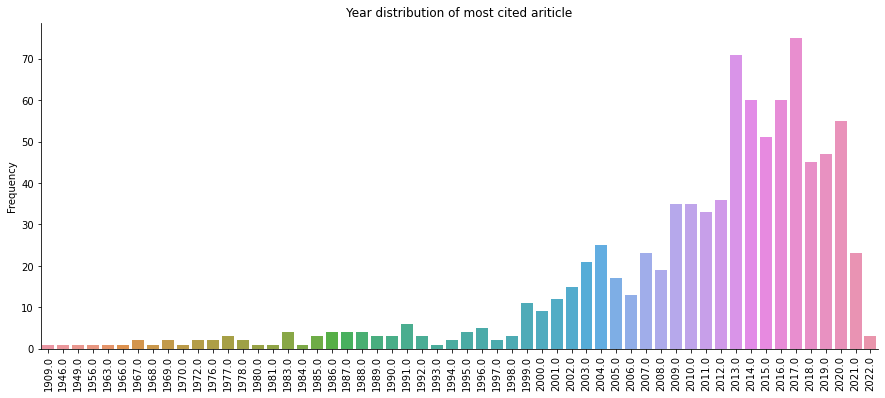

In [78]:
snscoutplot(df_uni,'year','Year distribution of most cited ariticle',xlabel='')

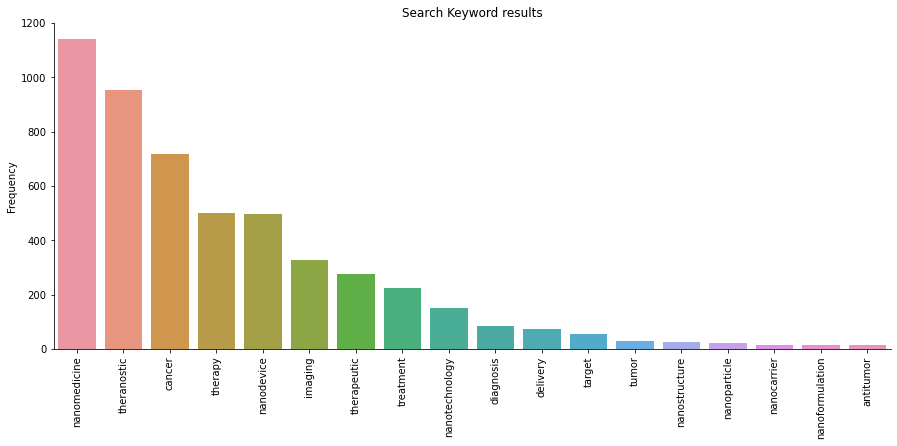

In [79]:
snscoutplot_unfil(df,'keyword','Search Keyword results',xlabel='')

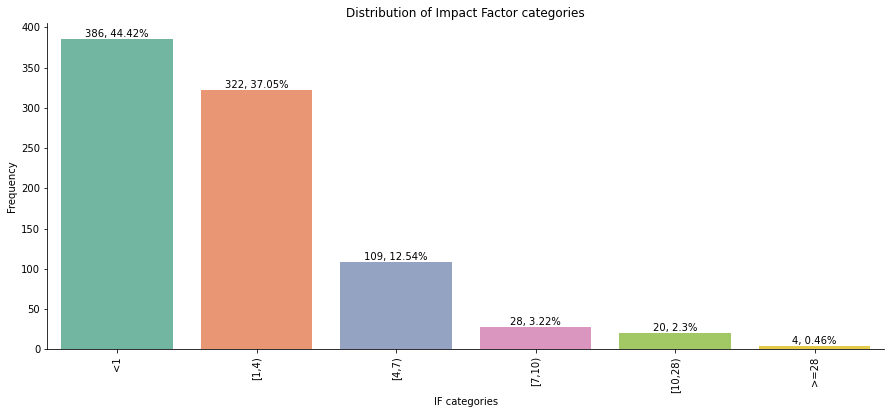

In [87]:
snscoutplot_order(df_uni,'IF_category','Distribution of Impact Factor categories',order=IF_cat_categories,xlabel='IF categories')

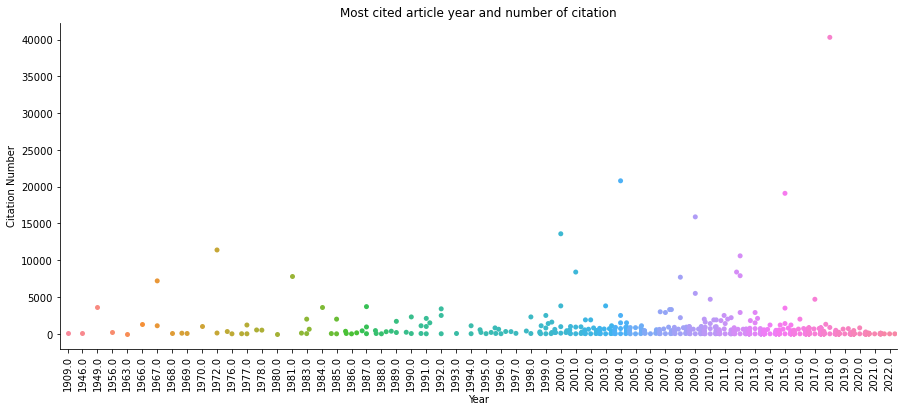

In [22]:
snsswarm(df_uni,'year','cited_by','Most cited article year and number of citation',
         xlabel='Year',ylabel='Citation Number')

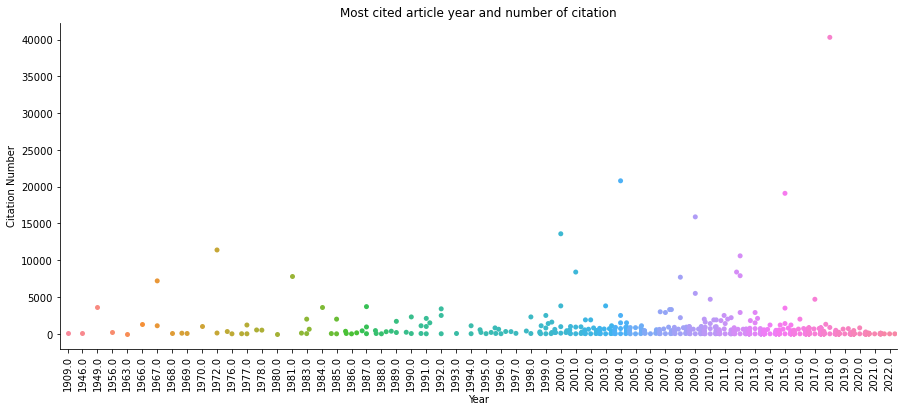

In [23]:
snsswarm(df_uni,'year','cited_by','Most cited article year and number of citation',
         xlabel='Year',ylabel='Citation Number')

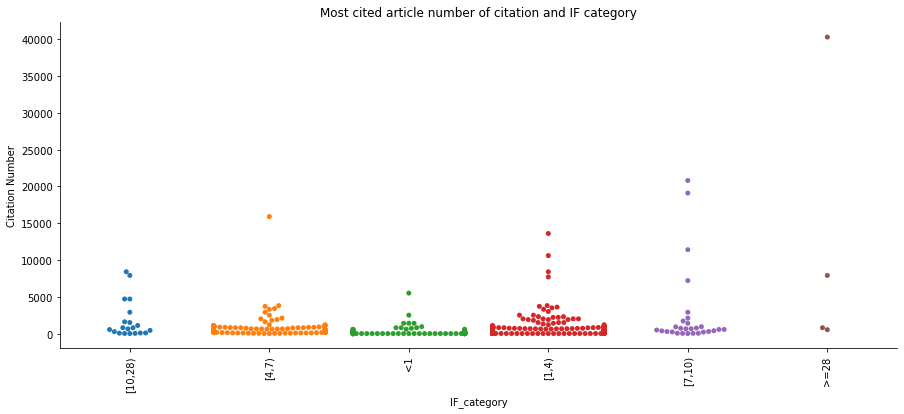

In [91]:
snsswarm(df_uni,'IF_category','cited_by','Most cited article number of citation and IF category',
         xlabel='IF_category',ylabel='Citation Number')

In [97]:
filtered_journals = df_uni[df_uni['impact_factor'] >= 28]['journal']
filtered_journals_2 = df_uni[df_uni['impact_factor'] >= 28]['year']
print(filtered_journals)
print(filtered_journals_2)

17                  Nature Nanotechnology
194                      Molecular Cancer
242                 Nature Reviews Cancer
245    Ca-A Cancer Journal for Clinicians
Name: journal, dtype: object
17     2017.0
194    1978.0
242    2012.0
245    2018.0
Name: year, dtype: float64


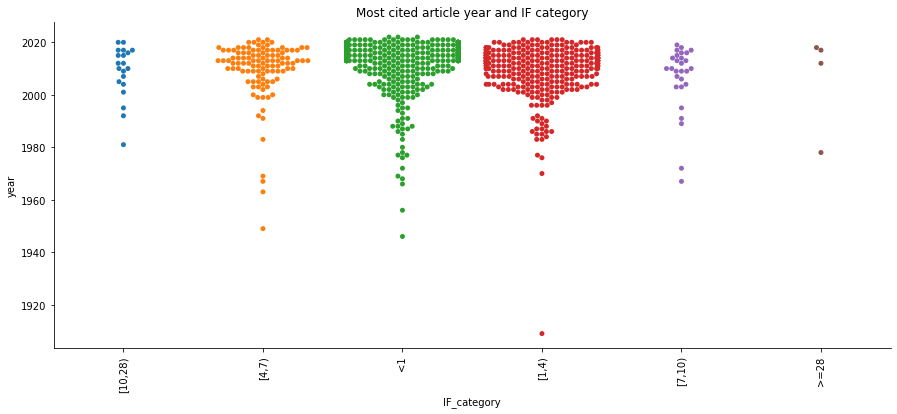

In [95]:
snsswarm(df_uni,'IF_category','year','Most cited article year and IF category',
         xlabel='IF_category',ylabel='year')

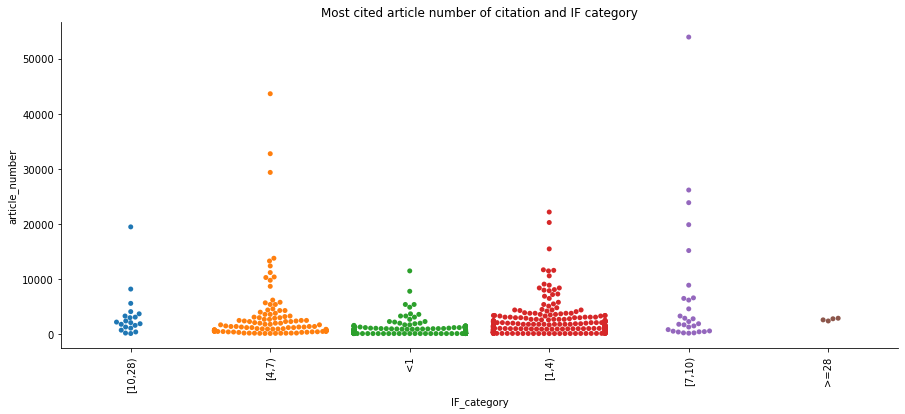

In [94]:
snsswarm(df_uni,'IF_category','article_number','Most cited article number of citation and IF category',
         xlabel='IF_category',ylabel='article_number')

16.916 %


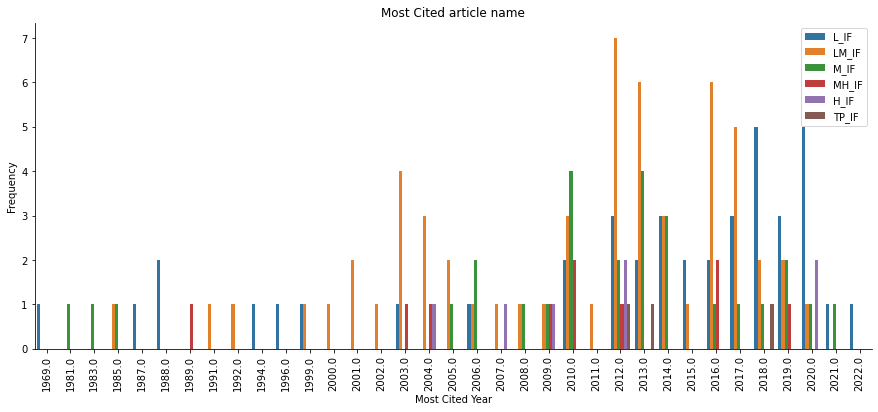

In [27]:
ar_name = df.loc[df.most_cited.str.contains('cancer'),:]
ar_name = ar_name.drop_duplicates(subset=['journal'])
print(round(len(ar_name)/len(df_uni)*100,3),'%')
fig = plt.figure(figsize=(15, 6))
sns.countplot(ar_name.year,
              hue=ar_name.IF_category,
             hue_order=IF_cat_categories)

plt.xlabel('Most Cited Year')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
sns.despine()
plt.legend(loc='upper right')
plt.title('Most Cited article name')
plt.show()

5.639 %


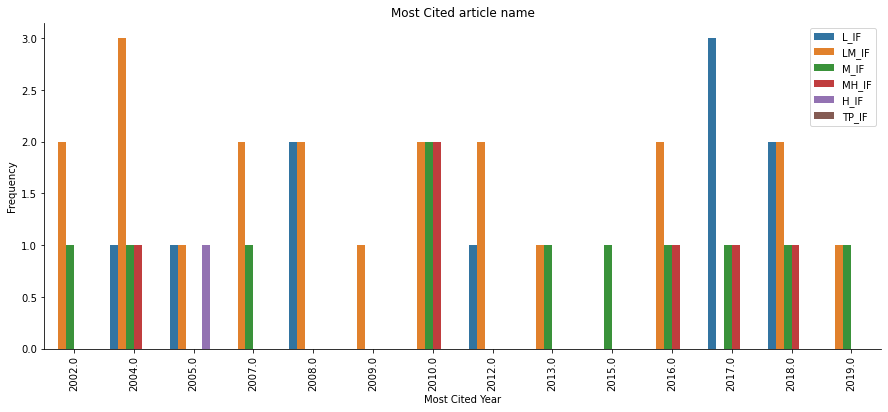

In [28]:
ar_name = df.loc[df.most_cited.str.contains('nano'),:]
ar_name = ar_name.drop_duplicates(subset=['journal'])
print(round(len(ar_name)/len(df_uni)*100,3),'%')
fig = plt.figure(figsize=(15, 6))
sns.countplot(ar_name.year,
              hue=ar_name.IF_category,
             hue_order=IF_cat_categories)
plt.xlabel('Most Cited Year')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
sns.despine()
plt.legend(loc='upper right')
plt.title('Most Cited article name')
plt.show()

5.754 %
50


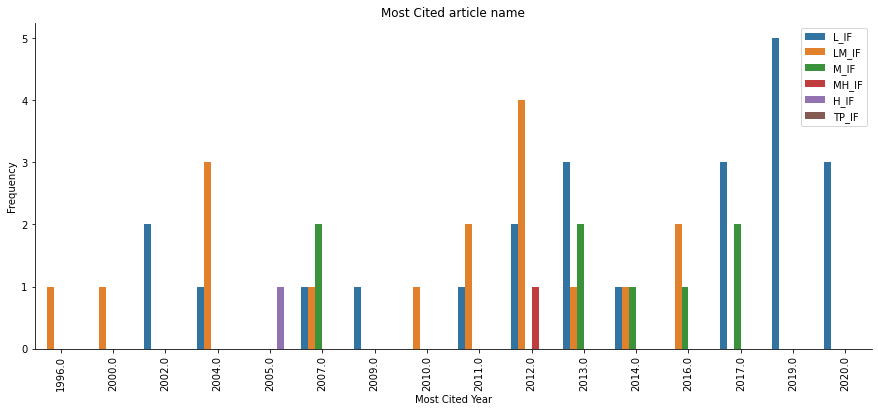

In [29]:
ar_name = df.loc[df.most_cited.str.contains('gold|silver|metal|iron'),:]
ar_name = ar_name.drop_duplicates(subset=['journal'])
print(round(len(ar_name)/len(df_uni)*100,3),'%')
print(len(ar_name))
fig = plt.figure(figsize=(15, 6))
sns.countplot(ar_name.year,
              hue=ar_name.IF_category,
             hue_order=IF_cat_categories)
plt.xlabel('Most Cited Year')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
sns.despine()
plt.legend(loc='upper right')
plt.title('Most Cited article name')
plt.show()

0.806 %


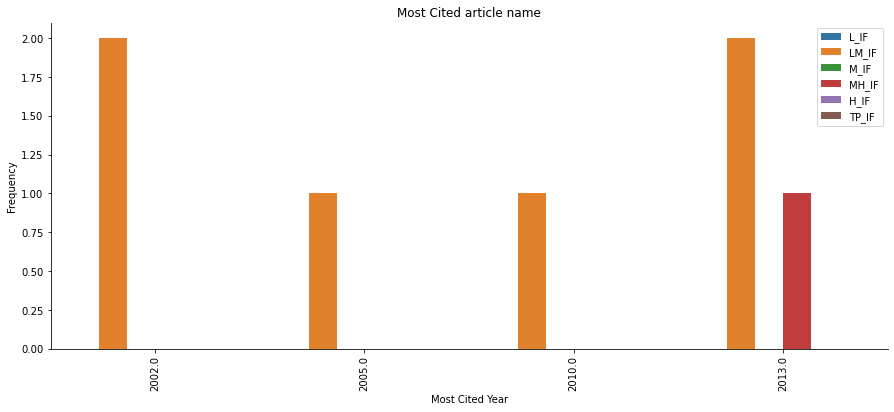

In [30]:
ar_name = df.loc[df.most_cited.str.contains('carbon|graphene|C60|fullerene'),:]
ar_name = ar_name.drop_duplicates(subset=['journal'])
print(round(len(ar_name)/len(df_uni)*100,3),'%')
fig = plt.figure(figsize=(15, 6))
sns.countplot(ar_name.year,
              hue=ar_name.IF_category,
             hue_order=IF_cat_categories)
plt.xlabel('Most Cited Year')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
sns.despine()
plt.legend(loc='upper right')
plt.title('Most Cited article name')
plt.show()

4.603 %


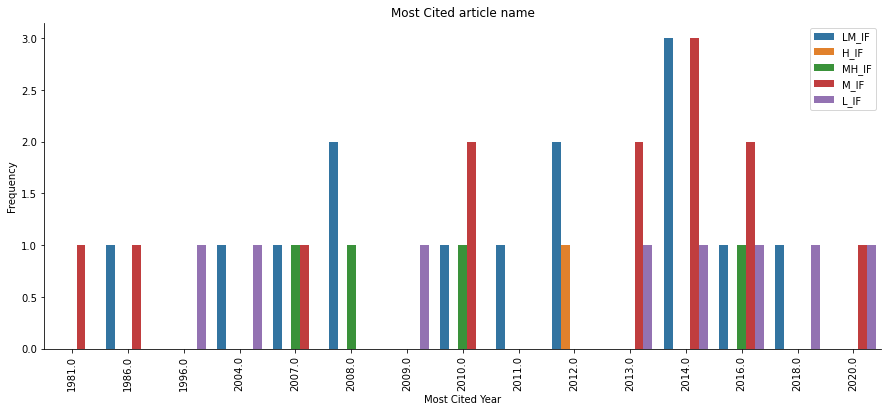

In [31]:
ar_name = df.loc[df.most_cited.str.contains('cancer treatment|diagnosis|delivery'),:]
ar_name = ar_name.drop_duplicates(subset=['journal'])
print(round(len(ar_name)/len(df_uni)*100,3),'%')
fig = plt.figure(figsize=(15, 6))
sns.countplot(ar_name.year,
              hue=ar_name.IF_category)
plt.xlabel('Most Cited Year')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
sns.despine()
plt.legend(loc='upper right')
plt.title('Most Cited article name')
plt.show()

16.916 %


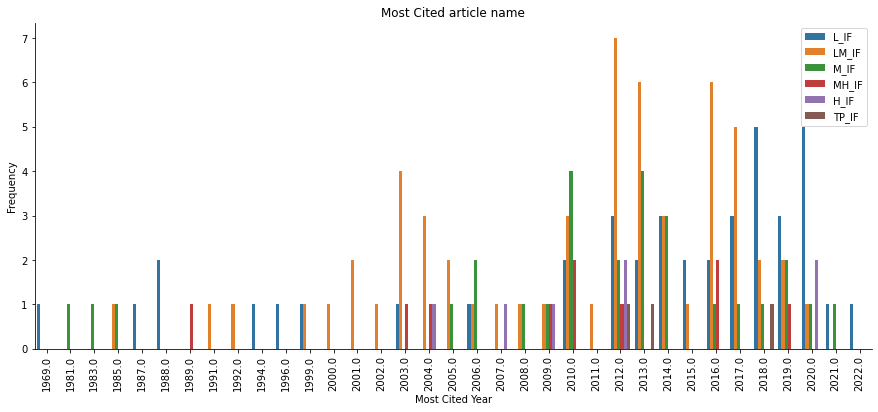

In [32]:
ar_name = df.loc[df.most_cited.str.contains('cancer'),:]
ar_name = ar_name.drop_duplicates(subset=['journal'])
print(round(len(ar_name)/len(df_uni)*100,3),'%')
fig = plt.figure(figsize=(15, 6))
sns.countplot(ar_name.year,
              hue=ar_name.IF_category,
             hue_order=IF_cat_categories)
plt.xlabel('Most Cited Year')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
sns.despine()
plt.legend(loc='upper right')
plt.title('Most Cited article name')
plt.show()

100.0 %


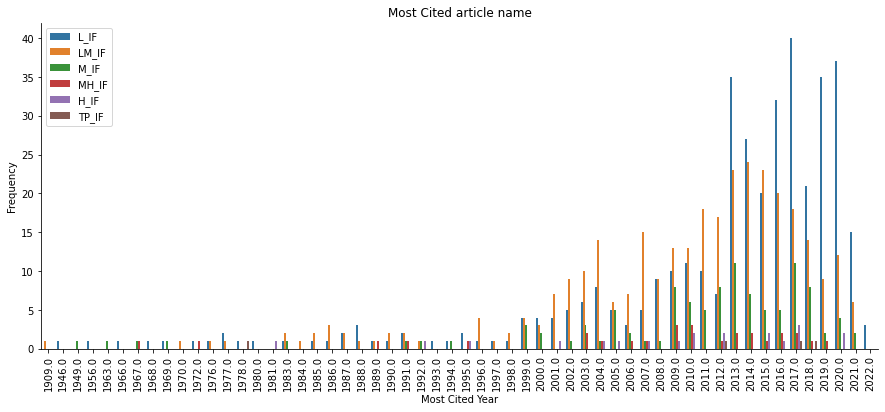

In [33]:
ar_name = df.loc[df.most_cited.str.contains(''),:]
ar_name = ar_name.drop_duplicates(subset=['journal'])
print(round(len(ar_name)/len(df_uni)*100,3),'%')
fig = plt.figure(figsize=(15, 6))
sns.countplot(ar_name.year,
              hue=ar_name.IF_category,
             hue_order=IF_cat_categories)
plt.xlabel('Most Cited Year')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
sns.despine()
plt.legend(loc='upper left')
plt.title('Most Cited article name')
plt.show()

3.337 %


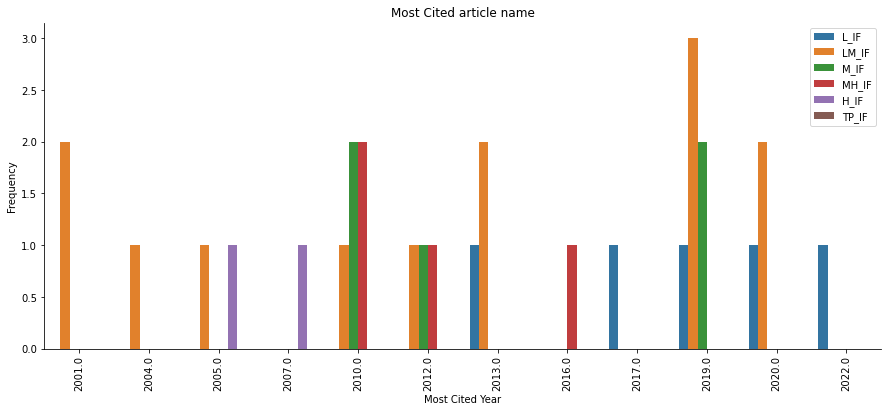

In [34]:
ar_name = df.loc[df.most_cited.str.contains('breast cancer'),:]
ar_name = ar_name.drop_duplicates(subset=['journal'])
print(round(len(ar_name)/len(df_uni)*100,3),'%')
fig = plt.figure(figsize=(15, 6))
sns.countplot(ar_name.year,
              hue=ar_name.IF_category,
             hue_order=IF_cat_categories)
plt.xlabel('Most Cited Year')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
sns.despine()
plt.legend(loc='upper right')
plt.title('Most Cited article name')
plt.show()

3.337 %


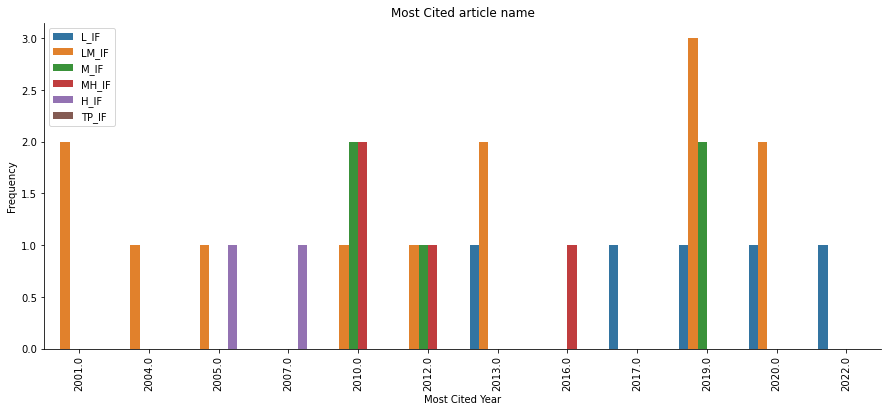

In [35]:
ar_name = df.loc[df.most_cited.str.contains('breast cancer'),:]
ar_name = ar_name.drop_duplicates(subset=['journal'])
print(round(len(ar_name)/len(df_uni)*100,3),'%')
fig = plt.figure(figsize=(15, 6))
sns.countplot(ar_name.year,
              hue=ar_name.IF_category,
             hue_order=IF_cat_categories)
plt.xlabel('Most Cited Year')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
sns.despine()
plt.legend(loc='upper left')
plt.title('Most Cited article name')
plt.show()

In [36]:
#!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter

def word_count(df,column,filter_col,filter_str,print_num,filter_out=True):
    
    if filter_out:
        print("Filter out: ", filter_col, "-", filter_str)
        journal_filtered = df.loc[[(filter_str not in x.lower()) for x in df[filter_col].fillna('')]]
    else:
        print("Filter for: ", filter_col, "-", filter_str)
        journal_filtered = df.loc[[(filter_str in x.lower()) for x in df[filter_col].fillna('')]]
    
    print(round(len(journal_filtered)/len(df)*100), "%")
    print(len(journal_filtered))
    
    words_concat = ' '.join(journal_filtered[column]).lower()
    words = words_concat.split()

    ignore = ['the', 'of', 'and', 'in','for','a','with','to','on','an','from','as','by']

    words = list(filter(lambda w: w.lower() not in ignore, words))

    # count the frequency of each word
    word_counts = Counter(words)

    # create a DataFrame from the word counts
    df_word_counts = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
    df_word_counts.index.name = 'word'
    df_word_counts = df_word_counts.sort_values(by='count', ascending=False)
    df_word_counts = df_word_counts.reset_index()
    df_word_counts['Percent'] = round(df_word_counts['count']/len(journal_filtered)*100,2)
    # display the DataFrame
    print(df_word_counts.head(print_num))
    return words_concat
    
def wordcloud_filted(words_concatm,title,fontsize=20):    
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(words_concatm)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=fontsize)
    plt.show()


Filter out:  journal - place_holder
100 %
869
              word  count  Percent
0          journal    345    39.70
1           cancer    223    25.66
2          therapy    220    25.32
3         research     98    11.28
4          imaging     92    10.59
5    international     67     7.71
6        treatment     65     7.48
7            image     53     6.10
8     therapeutics     51     5.87
9   nanotechnology     39     4.49
10        clinical     39     4.49
11               &     37     4.26
12        physical     35     4.03
13            drug     34     3.91
14     therapeutic     34     3.91
15        advances     33     3.80
16         current     29     3.34
17         medical     27     3.11
18        medicine     26     2.99
19         science     25     2.88


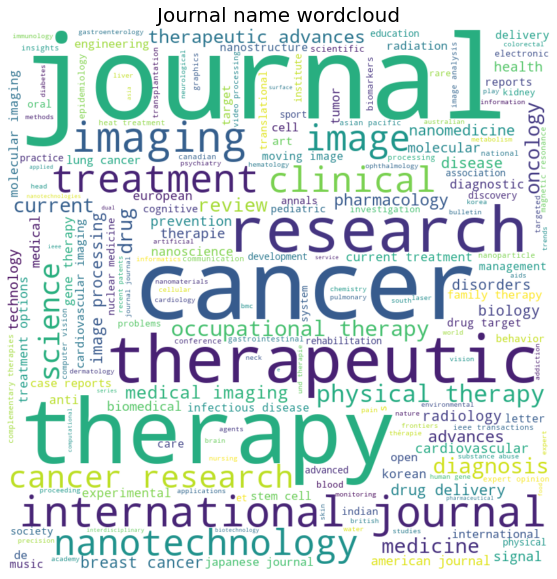

In [37]:
wc_result = word_count(df=df_uni,
                     column='journal',
                     filter_col='journal',
                     filter_str='place_holder',
                     print_num=20)
wordcloud_filted(wc_result,'Journal name wordcloud')

Filter out:  journal - place_holder
100 %
869
        word  count  Percent
0     cancer    143    16.46
1     review     79     9.09
2  treatment     51     5.87
3    therapy     40     4.60
4   patients     38     4.37
5     breast     37     4.26
6    imaging     36     4.14
7      using     33     3.80
8       cell     31     3.57
9      study     30     3.45


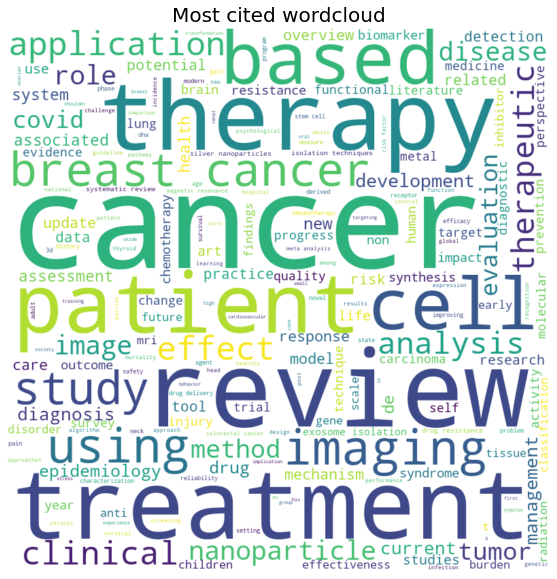

In [38]:
wc_result = word_count(df=df_uni,
                     column='most_cited',
                     filter_col='journal',
                     filter_str='place_holder',
                     print_num=10)
wordcloud_filted(wc_result,'Most cited wordcloud')

Filter out:  journal - review
98 %
850
        word  count  Percent
0     cancer    138    16.24
1     review     76     8.94
2  treatment     50     5.88
3    therapy     40     4.71
4   patients     38     4.47
5     breast     36     4.24
6    imaging     36     4.24
7      using     33     3.88
8       cell     31     3.65
9      study     30     3.53


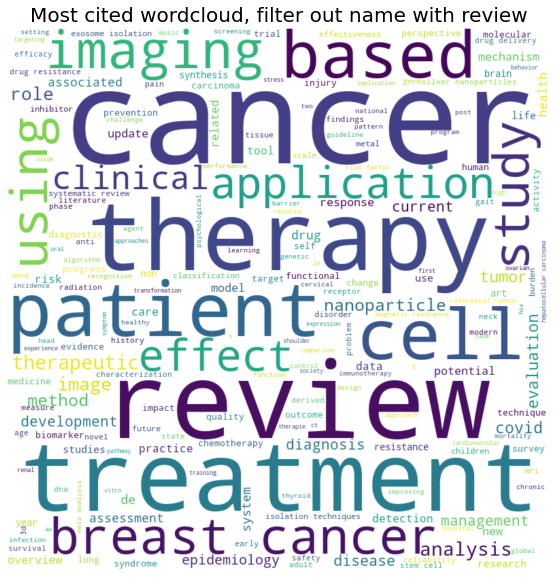

In [39]:
wc_result = word_count(df=df_uni,
                     column='most_cited',
                     filter_col='journal',
                     filter_str='review',
                     print_num=10)
wordcloud_filted(wc_result,'Most cited wordcloud, filter out name with review')

Filter out:  journal - cancer
73 %
633
        word  count  Percent
0     review     57     9.00
1  treatment     32     5.06
2    imaging     32     5.06
3     cancer     28     4.42
4      using     26     4.11
5    therapy     26     4.11
6   patients     23     3.63
7      study     22     3.48
8      image     22     3.48
9       drug     21     3.32


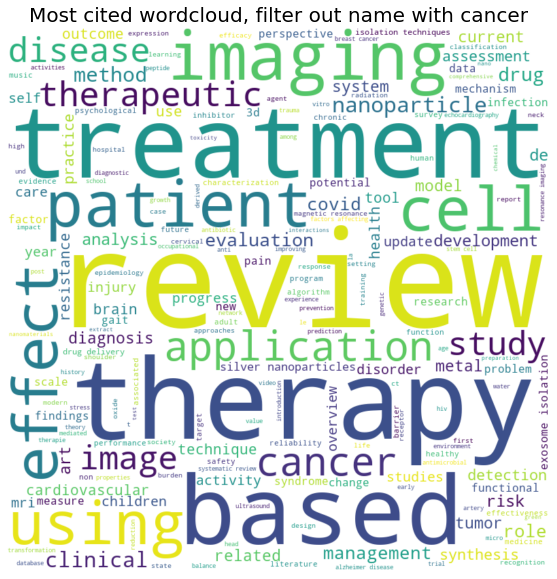

In [40]:
wc_result = word_count(df=df_uni,
                     column='most_cited',
                     filter_col='journal',
                     filter_str='cancer',
                     print_num=10)
wordcloud_filted(wc_result,'Most cited wordcloud, filter out name with cancer')

Filter out:  journal - therapy
74 %
640
        word  count  Percent
0     cancer    125    19.53
1     review     51     7.97
2  treatment     37     5.78
3     breast     34     5.31
4    imaging     33     5.16
5      using     28     4.38
6       drug     24     3.75
7   patients     24     3.75
8      image     23     3.59
9      study     20     3.12


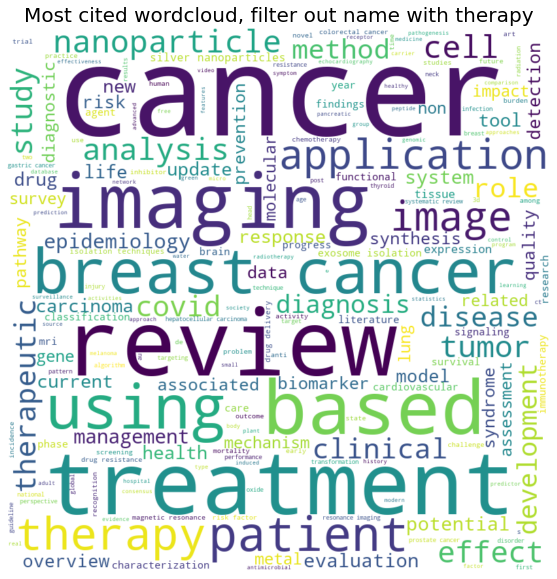

In [41]:
wc_result = word_count(df=df_uni,
                     column='most_cited',
                     filter_col='journal',
                     filter_str='therapy',
                     print_num=10)
wordcloud_filted(wc_result,'Most cited wordcloud, filter out name with therapy')

Filter out:  journal - imaging
89 %
777
        word  count  Percent
0     cancer    137    17.63
1     review     69     8.88
2  treatment     50     6.44
3    therapy     40     5.15
4   patients     37     4.76
5     breast     34     4.38
6       cell     30     3.86
7       drug     29     3.73
8      study     28     3.60
9      using     28     3.60


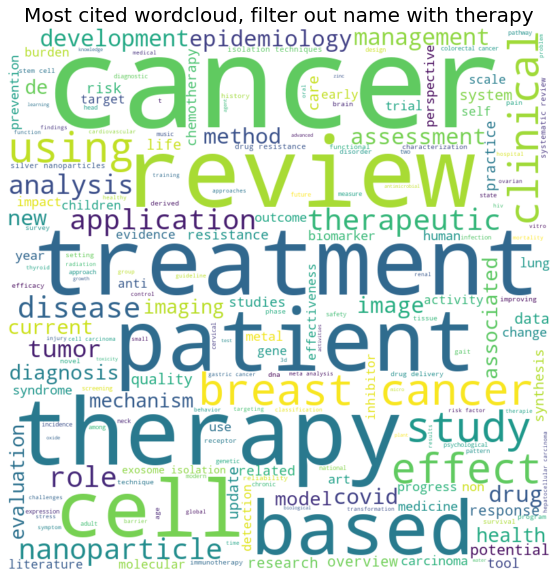

In [42]:
wc_result = word_count(df=df_uni,
                     column='most_cited',
                     filter_col='journal',
                     filter_str='imaging',
                     print_num=10)
wordcloud_filted(wc_result,'Most cited wordcloud, filter out name with therapy')

Filter for:  journal - imaging
11 %
92
         word  count  Percent
0     imaging     23    25.00
1       image     11    11.96
2      review     10    10.87
3    magnetic      9     9.78
4   resonance      7     7.61
5      cancer      6     6.52
6  evaluation      6     6.52
7     society      5     5.43
8       using      5     5.43
9         mri      5     5.43


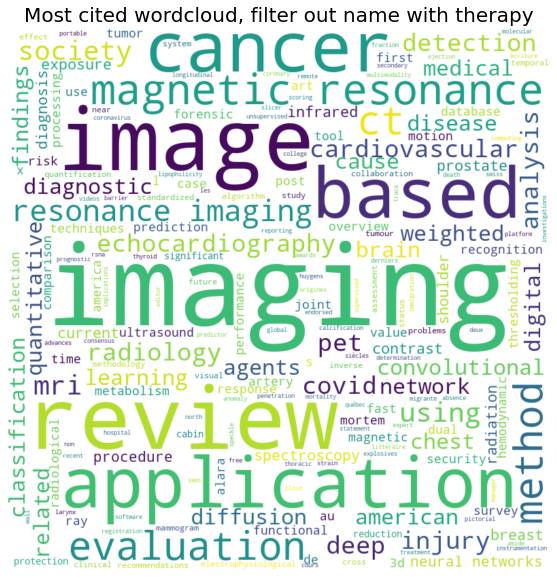

In [43]:
wc_result = word_count(df=df_uni,
                     column='most_cited',
                     filter_col='journal',
                     filter_str='imaging',
                     print_num=10,
                      filter_out=False)
wordcloud_filted(wc_result,'Most cited wordcloud, filter out name with therapy')

Filter for:  journal - cancer
27 %
236
        word  count  Percent
0     cancer    115    48.73
1     breast     29    12.29
2     review     22     9.32
3  treatment     19     8.05
4       cell     17     7.20
5    cancer:     16     6.78
6   patients     15     6.36
7    therapy     14     5.93
8  carcinoma     13     5.51
9   analysis     11     4.66


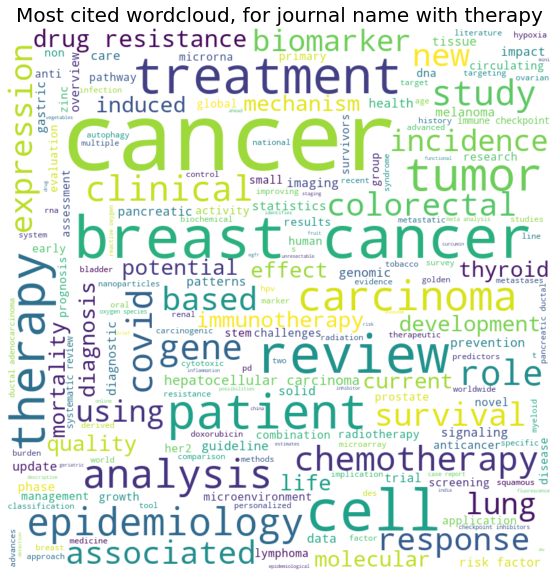

In [44]:
wc_result = word_count(df=df_uni,
                     column='most_cited',
                     filter_col='journal',
                     filter_str='cancer',
                     print_num=10,
                      filter_out=False)
wordcloud_filted(wc_result,'Most cited wordcloud, for journal name with therapy')

Filter for:  journal - research
12 %
100
        word  count  Percent
0     cancer     20     20.0
1  treatment     12     12.0
2     review     12     12.0
3    therapy      9      9.0
4       cell      8      8.0
5    current      6      6.0
6     breast      6      6.0
7    cancer:      5      5.0
8   patients      5      5.0
9      study      5      5.0


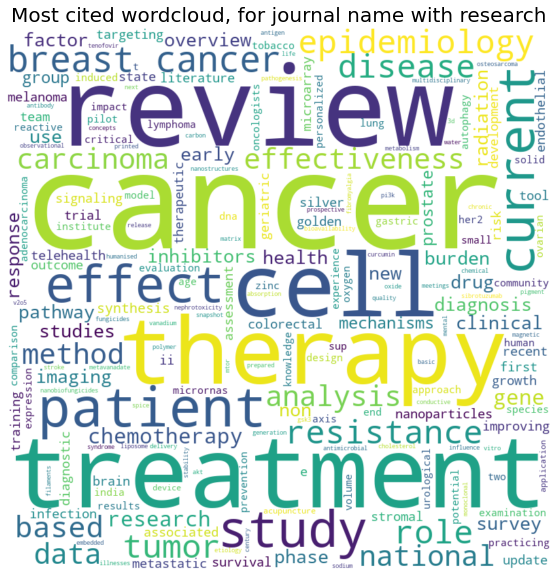

In [45]:
filter_str='research'
wc_result = word_count(df=df_uni,
                     column='most_cited',
                     filter_col='journal',
                     filter_str=filter_str,
                     print_num=10,
                      filter_out=False)
wordcloud_filted(wc_result,'Most cited wordcloud, for journal name with '+ filter_str)

Filter for:  journal - therapy
26 %
229
        word  count  Percent
0     review     28    12.23
1    therapy     21     9.17
2     cancer     18     7.86
3       cell     16     6.99
4   patients     14     6.11
5  treatment     14     6.11
6   clinical     11     4.80
7      study     10     4.37
8       care      9     3.93
9      cells      8     3.49


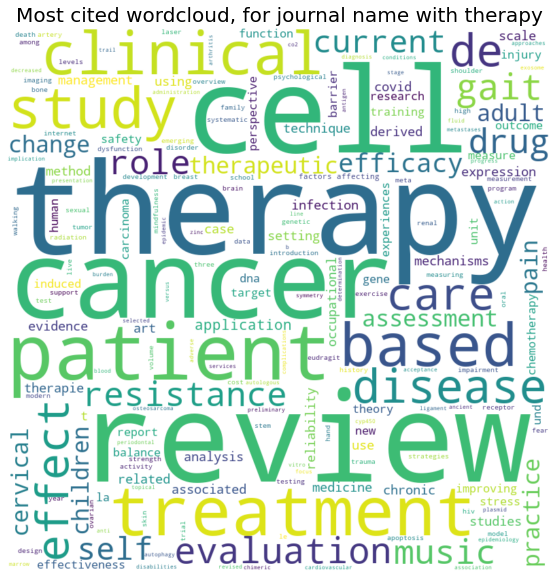

In [46]:
filter_str='therapy'
wc_result = word_count(df=df_uni,
                     column='most_cited',
                     filter_col='journal',
                     filter_str=filter_str,
                     print_num=10,
                      filter_out=False)
wordcloud_filted(wc_result,'Most cited wordcloud, for journal name with '+ filter_str)